## Imports

In [1]:
import sklearn
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from ClassMetrics import ClassMetrics
np.random.seed(42)

## Load Data and Format to Dataframe

In [2]:
data = load_iris()
TARGET_NAME = 'class'
PREDICTION_COL_NAME = 'predictions'

In [3]:
# Dictionary mapping integer class name to string name
class_name_mapping = dict(zip(range(3), data.target_names))

In [4]:
# Load data into dataframe
dataset = (pd.concat([pd.DataFrame(data.data), 
                      pd.Series(data.target, name=TARGET_NAME)],
                     axis=1))
dataset.head()

,0,1,2,3,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Split Data, Fit Model and Make Predictions

In [5]:
data_cols = [col for col in dataset.columns if col != TARGET_NAME]

In [6]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(dataset[data_cols], dataset[TARGET_NAME], test_size=.6)
# Instantiate and Fit Model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Make Predictions
predictions = logreg.predict(X_test)

# Add predictions to dataset
results = pd.concat([X_test.reset_index(drop=True), 
                     y_test.reset_index(drop=True),
                     pd.Series(predictions, name=PREDICTION_COL_NAME)], axis=1)
results[[TARGET_NAME, PREDICTION_COL_NAME]] = (results[[TARGET_NAME, PREDICTION_COL_NAME]]
                                               .apply(lambda x: x.map(class_name_mapping), axis=1))

## Instantiate ClassMetrics Object from dataset and predictions

In [7]:
ClassMetrics_results = ClassMetrics(results, TARGET_NAME, PREDICTION_COL_NAME)

### Summary Report as a DataFrame

*Note that classification accuracy is the score for the actual class, not the predicted class*
*This is why the below shows a predicted class count above the actual class count but a high classification accuracy*
*Defer to Precision/Recall for better understanding of predictions*

In [8]:
ClassMetrics_results.metrics_df

,class,actual_count,predicted_count,classification_accuracy,f1,precision,recall
0,setosa,35,35,1.000000,1.000000,1.000000,1.000000
1,versicolor,29,21,0.724138,0.840000,1.000000,0.724138
2,virginica,26,34,1.000000,0.866667,0.764706,1.000000


### View Confustion Matrix

In [9]:
ClassMetrics_results.confusion_matrix

array([[35,  0,  0],
       [ 0, 21,  8],
       [ 0,  0, 26]], dtype=int64)

### Count Comparison Between Actual and Prediction Classes

*Easy to see where a model is under/over predicting certain classes*
*Here, model has trouble distinguishing between versicolor and virginica*

In [10]:
ClassMetrics_results.count_comparison

,class,actual_count,predicted_count,difference
0,setosa,35,35,0
1,versicolor,29,21,-8
2,virginica,26,34,8


## Plotting

### Plot Normalized and Un-Normalized Confusion Matrices

Confusion matrix, without normalization


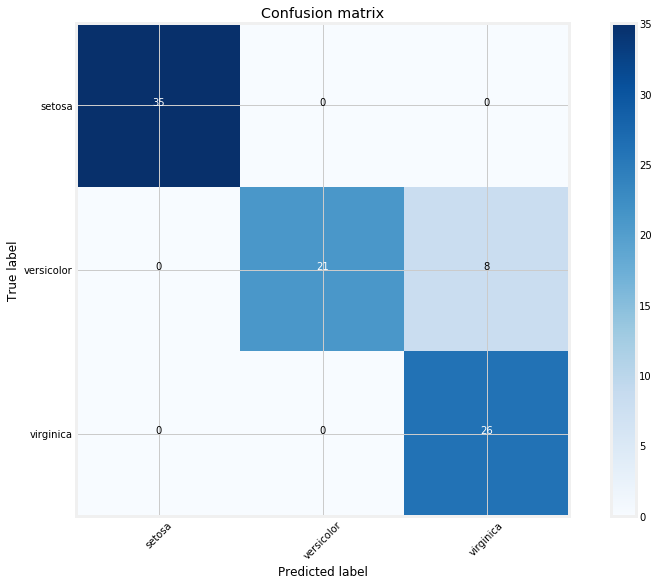

In [11]:
ClassMetrics_results.plot_confusion_matrix()

Normalized confusion matrix


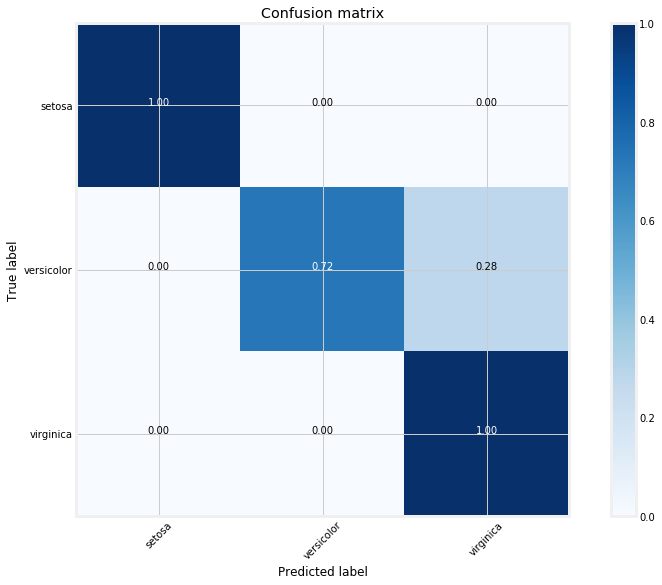

In [12]:
ClassMetrics_results.plot_confusion_matrix(normalize=True)

### Plot Actual Class Distributions, Predicted Class Distributions, or both together

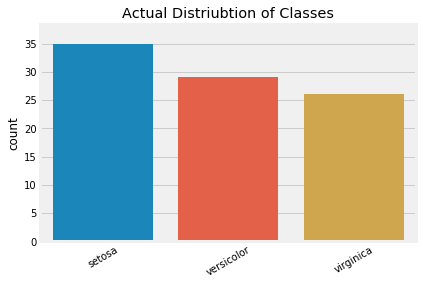

In [13]:
ClassMetrics_results.plot_target_distribution()

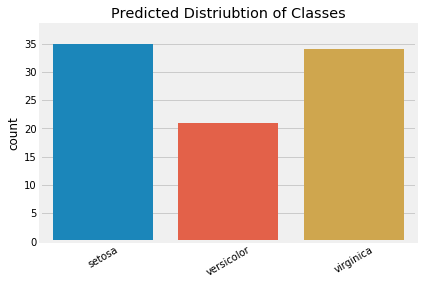

In [14]:
ClassMetrics_results.plot_predicted_distribution()

*Plotting both actual and predicted classes visualizes the disparity between predictions and reality*

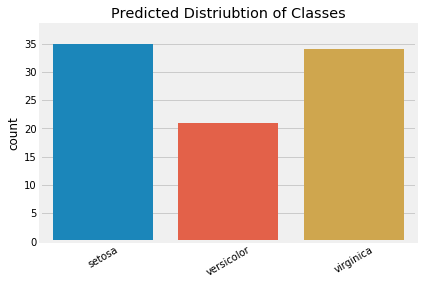

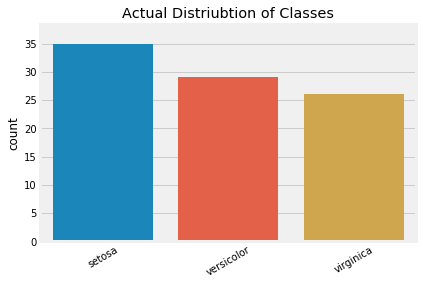

In [15]:
ClassMetrics_results.plot_distributions()

### Plot Class Metrics

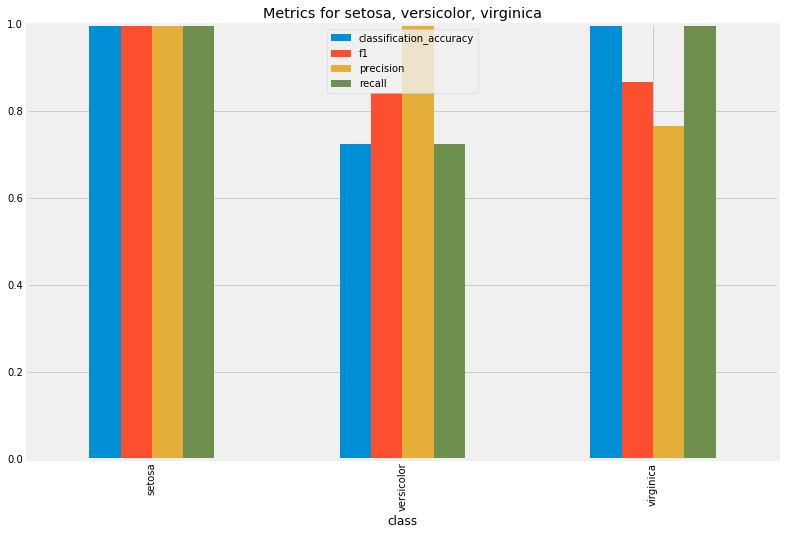

In [16]:
ClassMetrics_results.plot_class_metrics()

### Flexible to specific classes and metrics

*When the model predicts Versicolor, it's highly probable the true class is versicolor*

*However the model misses many Versicolors, and this is reflected in the low recall score*

*The missing Versicolors are predicted as Virginicas, which is reflected in the reversal of the metrics for that class*

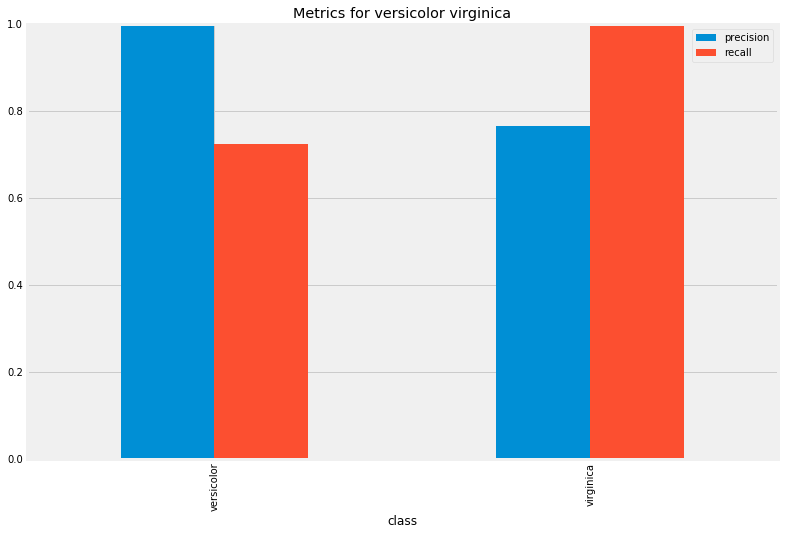

In [17]:
ClassMetrics_results.plot_class_metrics(classes=['versicolor', 'virginica'],
                                        metrics=['precision', 'recall'])